# Customer Segmentation Analysis

##  Objective:
The main goal of this project is to segment customers based on their behavior and attributes using clustering techniques. By understanding different customer groups, businesses can better target marketing strategies, improve customer retention, and boost revenue.



### **Step 1:** Import necessary libraries



We start by importing necessary libraries for data manipulation, visualization, and machine learning.

- `pandas` & `numpy`: For data handling and numerical operations
- `matplotlib` & `seaborn`: For data visualization
- `sklearn`: For preprocessing and clustering


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



### **Step 2:** Data Loading & Initial Exploration

We load the dataset `ifood_df.csv` to explore and analyze.

We perform initial exploration to understand the structure of the dataset, identify missing values, and review statistical summaries of features.

Key steps:
- Viewing column names and dataset shape
- Checking data types and null values
- Analyzing descriptive statistics of numerical columns

In [ ]:
# Load dataset
df = pd.read_csv('/content/ifood_df.csv')

In [ ]:
# Initial Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
# Check data types
df.dtypes

,0
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64


### **Step 3:** Data Cleaning

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

### **Step 4:** Feature Selection & Engineering

This part focuses on feature selection and feature engineering — very important steps before applying machine learning algorithms like KMeans.

In [ ]:
# Select relevant features
# features = ['Income', 'Recency', 'MntWines', 'MntFruits',
#             'MntMeatProducts', 'NumWebPurchases',
#             'NumCatalogPurchases', 'NumStorePurchases']

# Create total spending feature
df['MntTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds']].sum(axis=1)

# Create total purchases feature
df['TotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases',
                          'NumStorePurchases']].sum(axis=1)

# Update features list
features = ['Income', 'Recency', 'MntTotal', 'TotalPurchases']


### **Step 5:**  Data Scaling

 This part of the code standardizes the selected features, which is crucial for most machine learning algorithms like KMeans.

StandardScaler scales/normalizes your features so they have:

Mean = 0

Standard deviation = 1

This is also called Z-score normalization.

In [ ]:
# Standardize features
scaler = StandardScaler()                           #Create the scaler object
scaled_data = scaler.fit_transform(df[features])    #Apply the scaler to your selected features


### **Step 6:** Determine Optimal Clusters (Elbow Method)

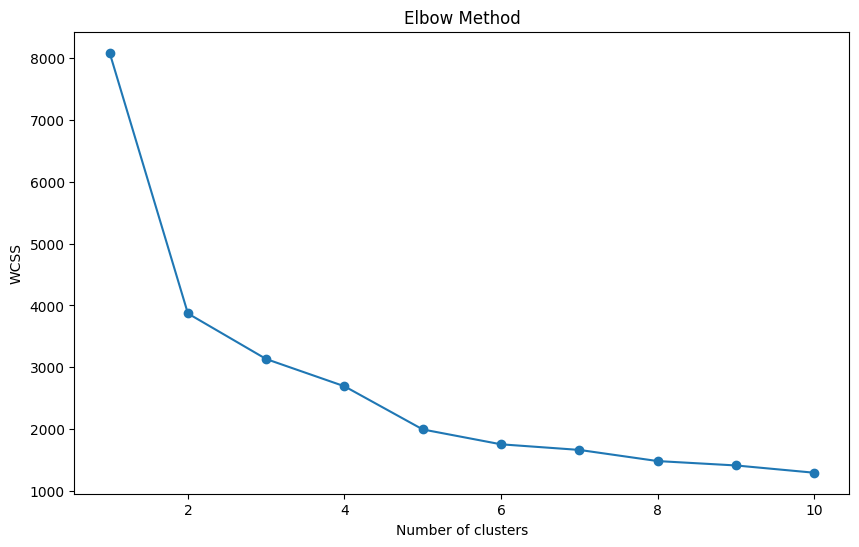

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**From the graph, we observe:**

1-A sharp drop in WCSS from 1 to 3 clusters

2-After 3, the decrease becomes more gradual

3-The “elbow” (i.e., the point of inflection) is clearly around 3 or 4


**The optimal number of clusters is likely 3, because:**

1-That’s where the WCSS drops significantly before the curve starts to flatten.

2-Adding more clusters beyond 3 only yields minor improvements in WCSS.



### **Step 7:** K-Means Clustering

In [ ]:
# Based on elbow plot, choose optimal clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to dataframe
df['Cluster'] = clusters


### **Step 8:** Cluster Visualization

To visually interpret the clusters formed by K-Means:
- **PCA (Principal Component Analysis)** was used to reduce the dataset dimensions from many features to just two (PCA1 and PCA2).
- This helps us project the multi-dimensional customer data onto a 2D plane for visualization.

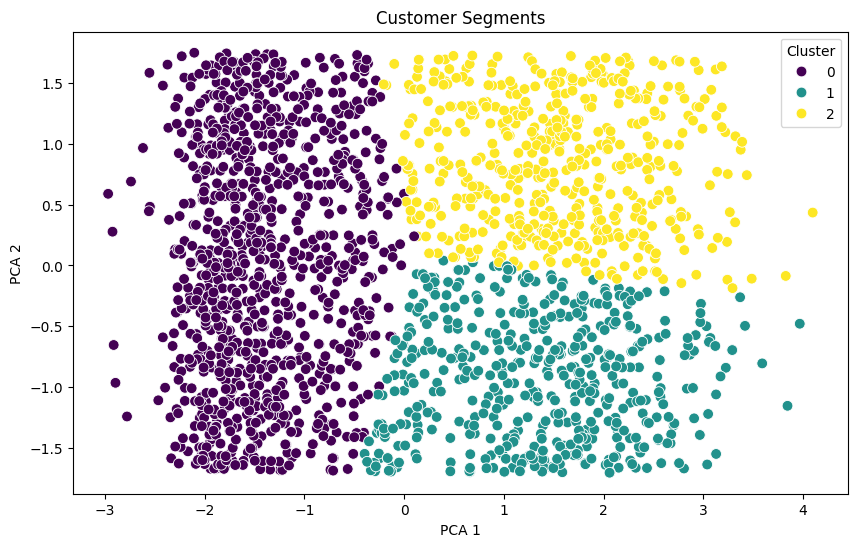

In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)                               #PCA (Principal Component Analysis)
principal_components = pca.fit_transform(scaled_data)

# Create visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x=principal_components[:,0], y=principal_components[:,1],
                hue=df['Cluster'], palette='viridis', s=60)
plt.title('Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


###  Plot:
- Each point represents a customer.
- Color indicates the cluster label (0, 1, or 2).
- We can clearly see distinct regions, proving that the clusters are well-separated in reduced space.

This step helps confirm that the segmentation is effective.

### **Step 9:** Cluster Analysis

now analyzing and visualizing cluster characteristics, which is a critical step in giving meaningful business insights to your customer segmentation.


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        35077.033333  0.751961  0.490196  49.701961   53.844118   5.921569   
1        67910.417339  0.139113  0.532258  22.221774  535.401210  47.572581   
2        69302.592079  0.118812  0.526733  73.405941  591.962376  46.825743   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              27.733333         8.927451          6.008824     19.211765   
1             294.072581        64.816532         45.330645     67.443548   
2             319.720792        68.796040         52.469307     70.728713   

         ...  marital_Widow  education_2n Cycle  education_Basic  \
Cluster  ...                                                       
0        ...       0.023529            0.103922         0.047059   
1        ...  

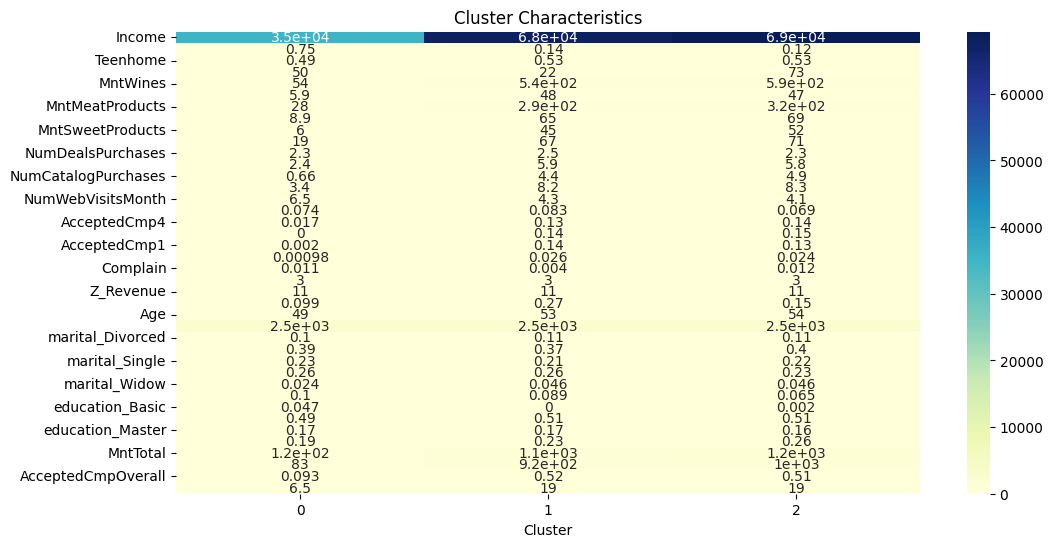

In [ ]:
# Analyze cluster characteristics
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

# Visualize cluster characteristics
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile.T, cmap='YlGnBu', annot=True)
plt.title('Cluster Characteristics')
plt.show()


## Cluster Profiling and Characteristics

Once clustering is complete, it's important to interpret what each segment represents.

We examine the **mean values of each feature** per cluster, including:
- Demographics: Income, Age, Kids/Teens at home, Education
- Spending Habits: MntWines, MntFruits, MntMeatProducts, Total Purchases
- Campaign Responses: AcceptedCmpOverall
- Website Interaction: NumWebVisitsMonth, NumCatalogPurchases



## Key Insights:
- **Cluster 0**: Lower-income, minimal spending, likely budget-conscious families.
- **Cluster 1**: High-income, high spenders, very active in campaigns and purchases — ideal for premium marketing.
- **Cluster 2**: Similar to Cluster 1 in spending but slightly older and less responsive to campaigns.

A heatmap and table are used to display these statistics and compare behavioral patterns across clusters.


## **Business Recommendations**

---**Cluster 0**– Low-Income, Low Spending, Low Engagement
Profile: Customers with low income, moderate age, high number of kids/teens at home, and minimal product spending. Low campaign responsiveness.

***Recommendations:***

- Offer budget-friendly product bundles and discounts.

- Use email campaigns or app notifications highlighting savings or family-value packs.

- Consider loyalty points or reward systems to gradually increase purchase frequency.

- Simplify access to referral programs to expand customer base through word-of-mouth.

---**Cluster 1** – High-Income, High Spending, Campaign Responsive
Profile: High-income customers with high spending across all product categories. Actively respond to marketing campaigns and promotions.

***Recommendations:***

- Focus on exclusive offers, early access to sales, or premium loyalty programs.

- Use personalized product recommendations via email or app based on previous purchases.

- Promote subscription-based models or premium delivery services.

- Introduce VIP memberships or invite-only events to build brand loyalty.

---**Cluster 2** – High-Income, Moderate Campaign Engagement
Profile: High-income customers, high spending behavior, but lower responsiveness to promotional campaigns.

***Recommendations:***

- Focus on product quality and convenience, not just discounts.

- Implement retargeting strategies (e.g., retargeting ads or abandoned cart follow-ups).

- Offer flexible payment plans or bundled high-value products.

- Leverage content marketing (e.g., blogs, videos) around product utility and brand story.

